# Basic ML workflow

<h1>Data Pre-Processing before applying ML Models</h1>
<ul>
<li>Handling missing values</li>
<li>Handling non-numeric data (handling categorical, ordinal variables and strings)</li>
<li>Feature engineering and creating new features out of existing features.</li>
<li>Extracting only useful and relevant features: Feature selection</li>
<li>Remove features with missing values above a particular threshold</li>
<li>Splitting data into Training and test sets</li>
<li>Checking for Class imbalance and tackling it</li>
<li>Standard scaling of data</li>
</ul>

In [5]:
import pandas as pd
import numpy  as np

# Creating a random database to depict the data cleaning procedures

In [10]:
df = pd.DataFrame({
    'Default': [1,0,0,0,0,0,1],
    'Income': [250000,400000,'NAN',440000,500000,700000,800000],
    'Age': [20,30, 40,35,25,40,'NAN'],
    'Name':['Allen','Sara','Lily','Rock','David','Rose','Mat'],
    'Gender': ['M','F','F','M','M','F','M'],
    'Type of job': ['Skilled','Unskilled','Super skilled','Super skilled','NAN','Skilled','Skilled'],
    'Amt of credit':['NAN',30000,50000,80000,40000,100000,300000],
    'Years employed':[1,10,12,6,4,13,12]})


In [11]:
df.columns

Index(['Default', 'Income', 'Age', 'Name', 'Gender', 'Type of job',
       'Amt of credit', 'Years employed'],
      dtype='object')

In [12]:
df=df.replace('NAN',np.NaN)

In [13]:
df

,Default,Income,Age,Name,Gender,Type of job,Amt of credit,Years employed
0,1,250000.0,20.0,Allen,M,Skilled,NaN,1
1,0,400000.0,30.0,Sara,F,Unskilled,30000.0,10
2,0,NaN,40.0,Lily,F,Super skilled,50000.0,12
3,0,440000.0,35.0,Rock,M,Super skilled,80000.0,6
4,0,500000.0,25.0,David,M,NaN,40000.0,4
5,0,700000.0,40.0,Rose,F,Skilled,100000.0,13
6,1,800000.0,NaN,Mat,M,Skilled,300000.0,12


# Implementing test train split method

In [39]:
X=df.drop('Default', axis=1)
y=df['Default']
# implementing train-test-split
from sklearn.model_selection import train_test_split

# 1.1) Handling missing values

In [40]:
#original order of columns
cols = X.columns

X_numeric=X.select_dtypes(include=['int', 'float']).columns
#joined columns numeric and non numeric
X_non_numeric=X.select_dtypes(exclude=['int', 'float']).columns
new = X_numeric.tolist() + X_non_numeric.tolist()

In [41]:
X_numeric

Index(['Income', 'Age', 'Amt of credit'], dtype='object')

In [42]:
X_non_numeric

Index(['Name', 'Gender', 'Type of job', 'Years employed'], dtype='object')

In [43]:
new

['Income',
 'Age',
 'Amt of credit',
 'Name',
 'Gender',
 'Type of job',
 'Years employed']

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

t = [('num', SimpleImputer(strategy='median'), X_numeric),
('cat', SimpleImputer(strategy='most_frequent'), X_non_numeric)]


transformer = ColumnTransformer(transformers=t, remainder='passthrough')

X = transformer.fit_transform(X) #numpy array

#DataFrame constructor with new columns names and added reindex for change by original order
X = pd.DataFrame(X, columns=new).reindex(cols, axis=1)

In [45]:
X

,Income,Age,Name,Gender,Type of job,Amt of credit,Years employed
0,250000,20,Allen,M,Skilled,65000,1
1,400000,30,Sara,F,Unskilled,30000,10
2,470000,40,Lily,F,Super skilled,50000,12
3,440000,35,Rock,M,Super skilled,80000,6
4,500000,25,David,M,Skilled,40000,4
5,700000,40,Rose,F,Skilled,100000,13
6,800000,32.5,Mat,M,Skilled,300000,12


# 1.2 Handling non-numeric data

<h2>Handling categorical data</h2>

In [46]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = pd.get_dummies(X['Gender'], drop_first=True)
# Drop column non_numeric_col as it is now encoded
X = X.drop('Gender',axis = 1)
# Join the encoded dataframe to X_train
X = X.join(onehotencoder)

In [47]:
X

,Income,Age,Name,Type of job,Amt of credit,Years employed,M
0,250000,20,Allen,Skilled,65000,1,1
1,400000,30,Sara,Unskilled,30000,10,0
2,470000,40,Lily,Super skilled,50000,12,0
3,440000,35,Rock,Super skilled,80000,6,1
4,500000,25,David,Skilled,40000,4,1
5,700000,40,Rose,Skilled,100000,13,0
6,800000,32.5,Mat,Skilled,300000,12,1


<h2>Handling ordinal Data</h2>

In [48]:

X['Type of job'] = X['Type of job'].map( {'Super skilled':3, 'Skilled':2, 'Unskilled':1})

In [49]:
X

,Income,Age,Name,Type of job,Amt of credit,Years employed,M
0,250000,20,Allen,2,65000,1,1
1,400000,30,Sara,1,30000,10,0
2,470000,40,Lily,3,50000,12,0
3,440000,35,Rock,3,80000,6,1
4,500000,25,David,2,40000,4,1
5,700000,40,Rose,2,100000,13,0
6,800000,32.5,Mat,2,300000,12,1


<h2>Handling string Data</h2>

In [50]:
cols_remove=['Name']
X = X.drop(cols_remove, axis=1)

<h2>Feature Engineering</h2>

In [51]:
X['Years employed percent'] = X['Years employed'] / X['Age']
X['Credit Income percent'] = X['Amt of credit'] / X['Income']

In [52]:
X

,Income,Age,Type of job,Amt of credit,Years employed,M,Years employed percent,Credit Income percent
0,250000,20,2,65000,1,1,0.05,0.26
1,400000,30,1,30000,10,0,0.333333,0.075
2,470000,40,3,50000,12,0,0.3,0.106383
3,440000,35,3,80000,6,1,0.171429,0.181818
4,500000,25,2,40000,4,1,0.16,0.08
5,700000,40,2,100000,13,0,0.325,0.142857
6,800000,32.5,2,300000,12,1,0.369231,0.375


<h2>Feature selection</h2>

In [57]:
#Selectkclass
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score')) 

         Features          Score
3   Amt of credit  225657.894737
0          Income    1485.955056
1             Age       2.699438
4  Years employed       1.077586
5               M       0.900000


<h2>Implementing test train split on training and test sets</h2>

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=66)

<h2>Scaling data</h2>

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [60]:
X_train

array([[-0.85383608, -0.5       , -1.60356745, -0.69040111,  0.36927447,
        -1.22474487,  0.77848636, -0.78882797],
       [-0.36393013,  1.5       ,  1.06904497, -0.49314365,  0.98473193,
        -1.22474487,  0.38847172, -0.50954428],
       [-0.57388982,  0.5       ,  1.06904497, -0.19725746, -0.86164044,
         0.81649658, -1.11587045,  0.16176938],
       [ 1.94562648,  0.        , -0.26726124,  1.97257461,  0.98473193,
         0.81649658,  1.19850212,  1.8809348 ],
       [-0.15397044, -1.5       , -0.26726124, -0.59177238, -1.47709789,
         0.81649658, -1.24958975, -0.74433193]])

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state = 0)
lr_clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [62]:
print('Accuracy on training set:',lr_clf.score(X_train,y_train))
print('Accuracy on test set:',lr_clf.score(X_test,y_test))

Accuracy on training set: 1.0
Accuracy on test set: 0.5


# Naive Bais

In [63]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [64]:
print('Accuracy on training set:',nb_clf.score(X_train,y_train))
print('Accuracy on test set:',nb_clf.score(X_test,y_test))

Accuracy on training set: 1.0
Accuracy on test set: 0.5


# Random Forest

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_clf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [66]:
print('Accuracy on training set:',rf_clf.score(X_train,y_train))
print('Accuracy on test set:',rf_clf.score(X_test,y_test))

Accuracy on training set: 0.875
Accuracy on test set: -0.9400000000000002


# Decision tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
print('Accuracy on training set',dec_clf.score(X_train, y_train))
print('Accuracy on test set:',dec_clf.score(X_test, y_test))

Accuracy on training set 1.0
Accuracy on test set: 0.5


# XgBoost

In [69]:
from xgboost import XGBClassifier
xgb_clf= XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
from sklearn.metrics import accuracy_score
print('Accuracy score on train_data: ', accuracy_score(y_true = y_train, y_pred = xgb_clf.predict(X_train).round()))
print('Accuracy score on test_data: ', accuracy_score(y_true = y_test, y_pred = xgb_clf.predict(X_test).round()))

Accuracy score on train_data:  0.8
Accuracy score on test_data:  0.5


# Ensemble of SVM and Logistic Regression

In [71]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
 estimators=[('lr', lr_clf), ('nb', nb_clf), ('decision', dec_clf)],
 voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('nb', GaussianNB()),
                             ('decision', DecisionTreeClassifier())])

In [79]:
type(y_test)

pandas.core.series.Series

In [81]:
 xgb_clf.predict(pd.Series([-0.85383608, -0.5 , -1.60356745, -0.69040111,  0.36927447,
        -1.22474487,  0.77848636, -0.78882797]))

array([0], dtype=int64)

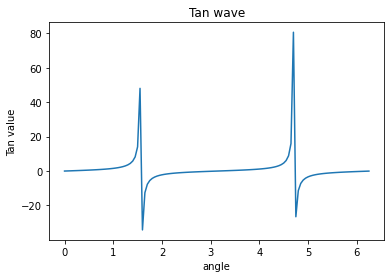

In [82]:
from matplotlib import pyplot as plt
import numpy as np
import math #needed for definition of pi
x = np.arange(0, math.pi*2, 0.05)
y = np.tan(x)
plt.plot(x,y)
plt.xlabel("angle")
plt.ylabel("Tan value")
plt.title('Tan wave')
plt.show()